## OpenAI Whisper
To get started, we'll first install the OpenAI Whisper Python package using pip.

In [1]:
!pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


We'll also make sure we have a GPU available in Google Colab. If you don't have a GPU, go to Runtime -> Change Runtime Type -> Hardware Accelator and select GPU. I have Colab Pro so I get access to Premium GPU's. Run the command below to show which GPU is being used in the current runtime:

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7384f0e4-ecac-a8f8-4109-aa4aa0217c18)


Whisper transcribes audio speech to text. To see this in action, we'll need some audio to operate on. We'll extract some audio from a YouTube video using the pytube Python package. Install if necessary using pip. (!pip install pytube -q)

Now that we have installed the dependencies, let's import whisper and the YouTube class from pytube.

In [4]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00


In [3]:
import whisper
from pytube import YouTube

Whisper has a variety of models of varying sizes. The large model will be more accurate but will also be more resource intensive.

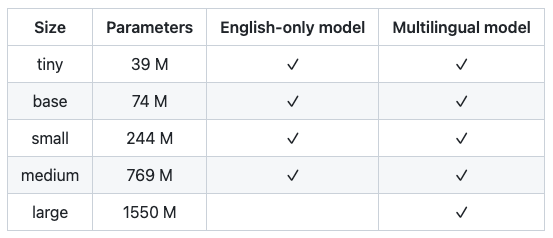

The base model will be sufficient for our needs. Let's load the base model like so:

In [4]:
model = whisper.load_model('base')

We'll now instantiate a "YouTube" object by passing in the video URL. This will allow us to retrieve metadata and stream info about the specified YouTube URL.

In [5]:
youtube_video_url = "https://www.youtube.com/watch?v=T3FC7qIAGZk"
youtube_video = YouTube(youtube_video_url)

Now that we have an pytube YouTube object, let's explore some of its attributes.

In [6]:
youtube_video.title

'Andrew Bustamante: CIA Spy | Lex Fridman Podcast #310'

In [7]:
dir(youtube_video)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_age_restricted',
 '_author',
 '_embed_html',
 '_fmt_streams',
 '_initial_data',
 '_js',
 '_js_url',
 '_metadata',
 '_player_config_args',
 '_publish_date',
 '_title',
 '_vid_info',
 '_watch_html',
 'age_restricted',
 'allow_oauth_cache',
 'author',
 'bypass_age_gate',
 'caption_tracks',
 'captions',
 'channel_id',
 'channel_url',
 'check_availability',
 'description',
 'embed_html',
 'embed_url',
 'fmt_streams',
 'from_id',
 'initial_data',
 'js',
 'js_url',
 'keywords',
 'length',
 'metadata',
 'publish_date',
 'rating',
 'register_on_complete_callback',
 'register_on_progress_callback',
 'stream_monostate',
 'streamin

In [8]:
youtube_video.streams

[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="8fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="vid

As you can see, we have a list of video and audio streams of varying quality. We can iterate over this list and observe the different resolutions and framerates.

In [9]:
for stream in youtube_video.streams:
  print(stream)

<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="8fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">
<Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">
<Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">
<St

In [10]:
streams = youtube_video.streams.filter(only_audio=True)
streams

[<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">, <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">, <Stream: itag="249" mime_type="audio/webm" abr="50kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="250" mime_type="audio/webm" abr="70kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]

In [11]:
stream = streams.first()
stream

<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">

Now that we have selected the stream we are working with, let's download the stream as lex_andy_cia_pod.mp4. You should see the file appear in the filesystem browser on the side panel of Colab. Click the refresh button if you don't see it after a while.

In [15]:
#stream.download(filename='lex_andy_cia_pod.mp4')

'/content/lex_andy_cia_pod.mp4'

It is possible to embed an audio player into Google Colab, but will not do this for now since I have seen the runtime get disconnected on large audio files. If you want a copy of the resulting audio, you can download it locally using the Colab the file browser.

In [14]:
import datetime

# save a timestamp before transcription
t1 = datetime.datetime.now()
print(f"Started at {t1}")

# do the transcription
output = model.transcribe("lex_andy_cia_pod.mp4")

# show time elapsed after transcription is complete.
t2 = datetime.datetime.now()
print(f"Ended at {t2}")
print(f"Time elapsed: {t2 - t1}")

Started at 2023-09-17 21:29:04.946837
Ended at 2023-09-17 21:39:12.636650
Time elapsed: 0:10:07.689813


How long with CPU? hours and counting Switch to GPU on Colab Free. How long? .  10:08. Compare to AWS Notebook next

In [ ]:
output

In [16]:
output['text']

" Masad will do anything. Masad has no qualms doing what it takes to ensure the survival of every Israeli citizen around the world. Most other countries will stop at some point, but Masad doesn't do that. The following is a conversation with Andrew Boost-A-Monte, former CIA covert intelligence officer and US Air Force combat veteran, including the job of operational targeting encrypted communications and launch operations for 200 nuclear intercontinental ballistic missiles. Andrews, over seven years as a CIA spy, have given him a skill set and a perspective on the world that is fascinating to explore. This is the Lex Friedman podcast to support it. Please check out our sponsors in the description. And now dear friends, here's Andrew Boost-A-Monte. The Central Intelligence Agency was formed almost 75 years ago. What is the mission of the CIA? How does it work? The mission of the CIA is to collect intelligence from around the world that supports a national security mission and be the cen

# Define Speaker Function and Mock Data

In [17]:
# Define Speaker Function and Mock Data

def get_speaker(segment):
    speaker_ids = {'1': 'Lex Fridman', '2': 'Andrew Bustamante'}
    return speaker_ids.get(segment.get('speaker_id', 'Unknown'))

# Mock data for demonstration
segments = [
    {'start': 0, 'speaker_id': '1'},
    {'start': 5, 'speaker_id': '2'},
    {'start': 10, 'speaker_id': '1'},
    {'start': 15, 'speaker_id': '2'},
    # ... (and so on)
]

# Create DataFrame for Speaker Segmentation

In [18]:
# Create DataFrame for Speaker Segmentation

import pandas as pd

# Create an empty DataFrame
df_speaker_segmentation = pd.DataFrame(columns=['Start Time', 'Speaker'])

# Populate the DataFrame
for segment in segments:
    start_time = segment['start']
    speaker = get_speaker(segment)
    new_row = pd.DataFrame({'Start Time': [start_time], 'Speaker': [speaker]})
    df_speaker_segmentation = pd.concat([df_speaker_segmentation, new_row], ignore_index=True)

# Show the DataFrame
print(df_speaker_segmentation)

  Start Time            Speaker
0          0        Lex Fridman
1          5  Andrew Bustamante
2         10        Lex Fridman
3         15  Andrew Bustamante


# Function to Convert Timestamp to Seconds

In [19]:
def timestamp_to_seconds(timestamp):
    time_parts = list(map(int, timestamp.split(':')))
    if len(time_parts) == 3:
        h, m, s = time_parts
    elif len(time_parts) == 2:
        h = 0
        m, s = time_parts
    else:
        raise ValueError("Invalid timestamp format")
    return h * 3600 + m * 60 + s

# Create DataFrame for Topic-Based Segmentation

In [22]:
import pandas as pd

# Define the topics and their timestamps
topics_timestamps = {
    'Introduction': '0:00',
    'CIA and the President': '0:56',
    'War in Ukraine': '12:34',
    'Most powerful intelligence agencies': '53:30',
    'David Petraeus': '1:00:40',
    'Undercover disguises': '1:10:17',
    'Human nature': '1:23:16',
    'CIA recruitment process': '1:32:36',
    'CIA and secrecy': '1:49:19',
    'Cyber security': '1:55:52',
    'Sexpionage': '2:06:34',
    'Private intelligence': '2:13:08',
    'NSA and Snowden': '2:26:35',
    'Conspiracy theories': '2:54:34',
    'CIA and UFOs': '3:15:42',
    'Spy tricks': '3:30:27',
    'Advice for young people': '3:47:10'
}

# Create an empty DataFrame
df_topic_segmentation = pd.DataFrame(columns=['Start Time (s)', 'Topic'])

# Create a list to hold the new rows
new_rows = []

# Populate the list with new rows
for topic, timestamp in topics_timestamps.items():
    start_time = timestamp_to_seconds(timestamp)
    new_row = {'Start Time (s)': start_time, 'Topic': topic}
    new_rows.append(new_row)

# Convert the list of new rows to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append new rows to the original DataFrame using pandas.concat
df_topic_segmentation = pd.concat([df_topic_segmentation, new_rows_df], ignore_index=True)

# Show the DataFrame
print(df_topic_segmentation)

   Start Time (s)                                Topic
0               0                         Introduction
1              56                CIA and the President
2             754                       War in Ukraine
3            3210  Most powerful intelligence agencies
4            3640                       David Petraeus
5            4217                 Undercover disguises
6            4996                         Human nature
7            5556              CIA recruitment process
8            6559                      CIA and secrecy
9            6952                       Cyber security
10           7594                           Sexpionage
11           7988                 Private intelligence
12           8795                      NSA and Snowden
13          10474                  Conspiracy theories
14          11742                         CIA and UFOs
15          12627                           Spy tricks
16          13630              Advice for young people


# Time-Based Segmentation (5-Minute Intervals)

In [25]:
# Initialize an empty dictionary to hold the segments
time_based_segments = {}

# Loop through the segments in the output
for segment in output['segments']:
    second = int(segment['start'])
    second = second - (second % 300)  # 5-minute intervals
    if second not in time_based_segments:
        time_based_segments[second] = []
    time_based_segments[second].append(segment['text'])

# Now, time_based_segments will contain the text for each 5-minute interval

# Visualizations for YouTube Attributes

Views: A time-series line chart could show how views have increased over time. You could use Plotly for this to make it interactive.

In [26]:
import plotly.express as px
fig = px.line(df, x='publish_date', y='views')
fig.show()

NameError: ignored